In [1]:
from matplotlib import pyplot as plt
import nsmod
import os 
import numpy as np
from numpy import sin, cos, tan
from matplotlib.ticker import MultipleLocator 
%matplotlib inline

%load_ext autoreload
%autoreload 2

from nsmod.switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Model

/usr/lib/python2.7/dist-packages/gtk-2.0/gtk/__init__.py:127: RuntimeWarning: PyOS_InputHook is not available for interactive use of PyGTK
  set_interactive(1)


## Pulse amplitude 

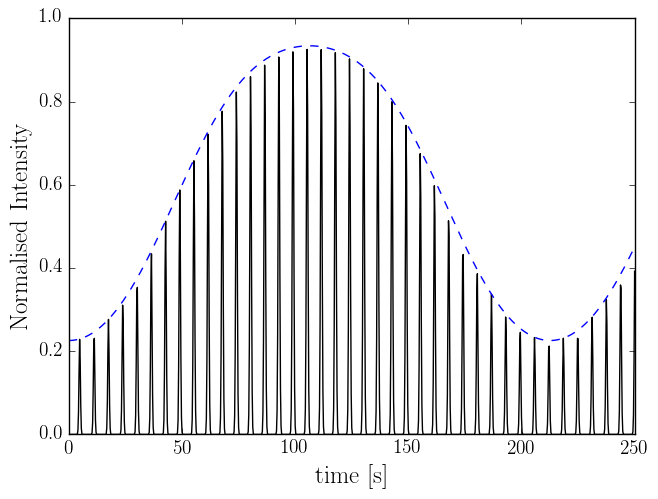

In [13]:
epsI1=0.0
epsI3=3.0e-2
epsA=0.0
omega0=1
error=1e-12
T=250 
chi0 = 30.0
AnomTorque=True
a0=10.0
upsilon=0.0
n=100000
cleanup=False
PhiO=0
ThetaO=45
sigmaB=0.25

Phi0 = np.radians(PhiO)
ThetaO = np.radians(ThetaO)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)
    
ax = Plot.Intensity(file_name, PhiO, ThetaO, sigmaB)
plt.savefig("img/intensity_variation.pdf")
plt.show()

## Cosine and constant

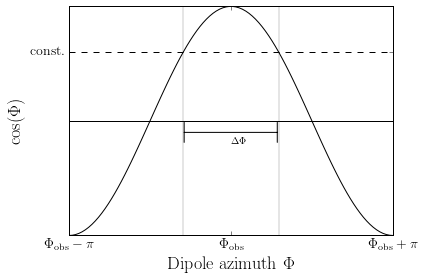

In [12]:
from numpy import pi
ax = plt.subplot(111)

x = np.linspace(-pi, pi, 100)
ax.axhline(0, ls="-", color="k")
ax.plot(x, np.cos(x))
ax.set_xlim(-pi, pi)
ax.set_xticks([-pi, 0, pi])
ax.set_xticklabels(["$\Phi_{\mathrm{obs}} - \pi$", 
                    "$\Phi_{\mathrm{obs}}$",
                    "$\Phi_{\mathrm{obs}} + \pi$"])
k = 0.6
ax.axhline(k, ls="--", color="k")
ax.set_yticks([k])
ax.set_yticklabels(['const.'])

x_fill = np.linspace(np.arccos(k), -np.arccos(k), 100)
#ax.fill_between(x_fill, 0, np.cos(x_fill), color="k", alpha=0.5)

ax.set_xlabel("Dipole azimuth $\Phi$")
ax.set_ylabel("$\cos(\Phi)$")

ax.annotate("",
            xy=(-np.arccos(k)-0.02, -0.1), xycoords='data',
            xytext=(np.arccos(k)+0.01, -0.1), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),
            )
ax.annotate("$\Delta\Phi$",
            xy=(0, -0.2), xycoords='data',
            xytext=(0, -0.2), textcoords='data', 
            )

ax.axvline(-np.arccos(k), lw=0.2, color="k")
ax.axvline(np.arccos(k), lw=0.2, color="k")
plt.tight_layout()
plt.savefig("img/CosineIllustration.pdf")
plt.show()

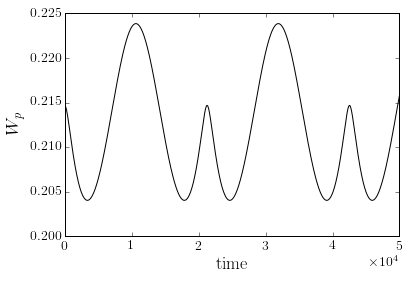

In [10]:
epsI1=0.0
epsI3=3.0e-4
epsA=0.0
omega0=1.
T=5e4
chi0 = 12.0
a0=10
AnomTorque=True
upsilon=0.0
n=100000
cleanup=False,
ThetaO=10
sigmaB = 0.3
eta=0.01

ThetaO = np.radians(ThetaO)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)

ax = Plot.PulseWidth(file_name, Theta0, sigmaB , p=50,
                      eta=eta, ls="-")
plt.savefig("img/Pulse_width_modulation.pdf")
plt.show()

## Comparing precession and switching

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:23: RuntimeWarning: invalid value encountered in arccos


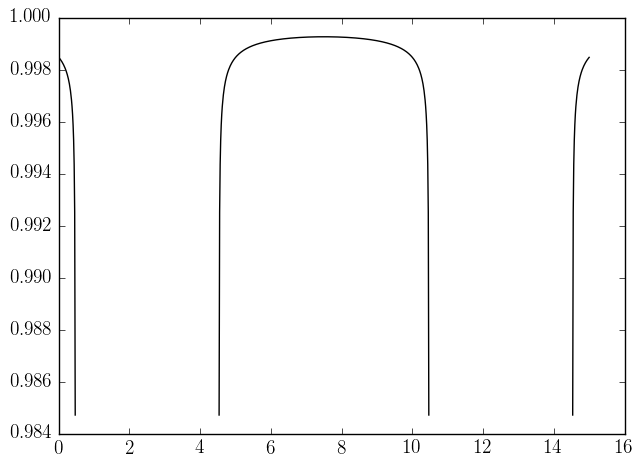

In [61]:
from numpy import pi, cos, sin

def Wp(P, Theta, ThetaO, sigmaB, p=10):
    """ Analytic calculation of the pulse width

    Parameters
    ----------
    Phi_dot, Theta : array_like
        The physical parameters as defined in Jones 2001
    ThetaO : float
        The value, in radians of the observers Theta position
    sigmaB : float
        Measure of the angular beam width
    p : float
        The percentage amount of beam width

    Returns
    -------
    Beam width at p
    """
    A = np.cos(np.sqrt((Theta - ThetaO)**2 - 2 * sigmaB**2 * np.log(100./p)))
    B = (A-np.sin(Theta) * np.sin(ThetaO)) / (np.cos(Theta) * np.cos(ThetaO))
    return P * (1 - np.arccos(B)/np.pi )
# Problem with abs 
chi = 1.6
theta = 0.1
tauP = 10
P = 1
ThetaO=1.5
sigmaB = 1.0e-4

time = np.linspace(0, 15, 1000)
psi = 2*pi * time/tauP 
Theta = np.arccos(sin(theta) * sin(psi) * sin(chi) + cos(theta) * cos(chi))

ax = plt.subplot(111)
#ax.plot(time, Theta)
ax.plot(time, Wp(P, Theta, ThetaO, sigmaB), "-")
plt.show()